# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Objective
- Perform denoising of the CIFAR-10 dataset images using a Convolutional Autoencoder (AE)

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="400" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Denosing_CIFAR10_Walkthrough.mp4" type="video/mp4">
</video>
""")



## Dataset

In this experiment, we will use the CIFAR-10 dataset. It consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images.

**Dataset:** CIFAR-10 is a small image (32 x 32) dataset made up of 60000 images subdivided into 10 main categories as shown below:


![alt text](https://debuggercafe.com/wp-content/uploads/2019/12/cifar10_small.jpg)

## AI/ML Technique

Autoencoders are neural networks that aim to copy their inputs to their outputs. They compress the input into a latent-space representation, and then reconstruct the output from this representation. This kind of network is composed of two parts :(1) Encoder - compresses the input into a latent-space representation (2) Decoder - reconstructs the input from the latent space representation. In training the autoencoder to copy the input to the output, the latent representation h takes on useful properties. This leads to its wide application in dimension reduction and image noise reduction. The image below shows how images are reconstructed by an autoencoder
![alt text](https://miro.medium.com/max/600/1*V_YtxTFUqDrmmu2JqMZ-rA.png)

### Setup Steps

In [4]:
#@title Please enter your registration id to start:  { run: "auto", display-mode: "form" }
Id="2100121"#@param{type:"string"}

In [5]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password="5142192291"#@param{type:"string"}

In [6]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U3W15_34_Denoising_Autoencoder_CIFAR10_A" #name of the notebook
def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print ("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D, BatchNormalization
from keras.datasets import cifar10
import matplotlib.pyplot as plt

### Load the Data

In [10]:
# Loading the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### Normalize the data within the range of 0 and 1

In [11]:
x_train = x_train/255 # YOUR CODE HERE: To normalize the train coloured images
x_test = x_test/255 # YOUR CODE HERE: To normalize the test coloured images

In [13]:
x_train , len(x_train)

(array([[[[0.23137255, 0.24313725, 0.24705882],
          [0.16862745, 0.18039216, 0.17647059],
          [0.19607843, 0.18823529, 0.16862745],
          ...,
          [0.61960784, 0.51764706, 0.42352941],
          [0.59607843, 0.49019608, 0.4       ],
          [0.58039216, 0.48627451, 0.40392157]],
 
         [[0.0627451 , 0.07843137, 0.07843137],
          [0.        , 0.        , 0.        ],
          [0.07058824, 0.03137255, 0.        ],
          ...,
          [0.48235294, 0.34509804, 0.21568627],
          [0.46666667, 0.3254902 , 0.19607843],
          [0.47843137, 0.34117647, 0.22352941]],
 
         [[0.09803922, 0.09411765, 0.08235294],
          [0.0627451 , 0.02745098, 0.        ],
          [0.19215686, 0.10588235, 0.03137255],
          ...,
          [0.4627451 , 0.32941176, 0.19607843],
          [0.47058824, 0.32941176, 0.19607843],
          [0.42745098, 0.28627451, 0.16470588]],
 
         ...,
 
         [[0.81568627, 0.66666667, 0.37647059],
          [0.78823

### Build and compile the autoencoder model

**padding:** In Keras, this is specified via the “padding” argument on the Conv2D layer, which has the default value of ‘valid‘ (no padding). This means that the filter is applied only to valid ways to the input.

The ‘padding‘ value of ‘same‘ calculates and adds the padding required to the input image (or feature map) to ensure that the output has the same shape as the input.

**Upsampling:** The Upsampling layer is a simple layer with no weights that will double the dimensions of input and can be used in a generative model when followed by a traditional convolutional layer

In [14]:
model = Sequential()

# YOUR CODE HERE: To define and add second convolutional layer with filters = 32 and kernel_size=3 and activation 'relu'
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))

# YOUR CODE HERE: To define and add a Batch Normalization
model.add(BatchNormalization())     # 32x32x32

# YOUR CODE HERE: To define and add second convolutional layer with filters = 32 and kernel_size=3, stride=2 and activation 'relu'
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))      # 16x16x32

# YOUR CODE HERE: To define and add second convolutional layer with filters = 32 and kernel_size=3, stride=1 and activation 'relu'
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32

# YOUR CODE HERE: To define and add a Batch Normalization
model.add(BatchNormalization())     # 16x16x32

# To double the dimensions of input 
model.add(UpSampling2D())

model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
# YOUR CODE HERE: To define and add a Batch Normalization
model.add(BatchNormalization())

# YOUR CODE HERE: To define and add second convolutional layer with filters = 3 and kernel_size=1, stride=1 and activation 'sigmoid'
model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3

# YOUR CODE HERE: To define the compile() method with optimizer, metrics and the loss
model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9

### Training the model

Training the model by fitting the noisy images and original images with 

In [15]:
# Adding different noise vectors for each epoch
num_epochs = 5    # It takes some time to run this cell

NOISE = 0.3
for i in range(num_epochs):
    noise = np.random.normal(0, NOISE, x_train.shape)
    # YOUR CODE HERE: To train the model with 'x_train + noise', 'x_train', epochs=1 and the batch_size=100
    model.fit(x_train + noise, x_train, epochs=1, batch_size=100)

500/500 [==============================] - 4s 9ms/step - loss: 0.0062 - accuracy: 0.6936


### Testing the model with 400 images

In [16]:
# Test data with 400 images
x_test = x_test[:400]

# Taking noise randomly
noise = np.random.normal(0, NOISE, x_test.shape)

# Adding noise to the test data
noisy = x_test + noise

# Predicting the test images
pred_imgs = model.predict(noisy) # YOUR CODE HERE: TO predict the model on the test images (noisy)

### Comparative visualization of Noisy Input Images and Denoised Reconstructed output



Below function takes the input of test images and to plot the images in subplot by taking unique label indices 

In [19]:
def plot_Images(test_Images):
    # YOUR CODE HERE to plot the images
    image=1
    plt.figure(figsize=(15,12))
    for i in np.unique(y_test):
      idx = np.where(y_test==i)[0][0]
      plt.subplot(1,10,image)
      Image = np.clip(test_Images[idx], 0, 1)
      plt.imshow(Image)
      image +=1

    plt.show()

Original Images 



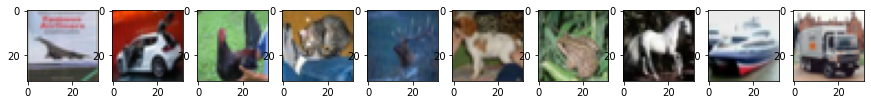

In [20]:
print("Original Images \n")
plot_Images(x_test)

Images with noise 



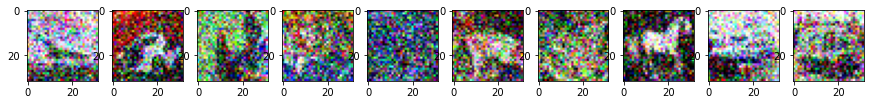

In [21]:
print("Images with noise \n")
plot_Images(noisy)

Images after decoding 



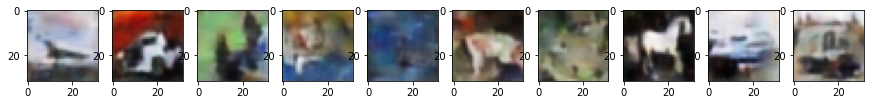

In [22]:
print("Images after decoding \n")

# YOUR CODE HERE: To call the plot_Images function with predicted images
plot_Images(pred_imgs)

### Please answer the questions below to complete the experiment:




In [23]:
#@title State True or False: In this experiment, Autoencoders will be able to remove noise from the images without comparing the original images{ run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False"#@param ["","True","False"]


In [24]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [26]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nn" #@param {type:"string"}


In [27]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [28]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [30]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [31]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 12296
Date of submission:  23 Dec 2020
Time of submission:  07:08:57
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
